In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [7]:
print("#"*70)
# Generate some random data

np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)

######################################################################


In [8]:
coef[10:] = 0 # sparsify the matrix
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train and test sets

n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [10]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print(f'r^2 on test data: {r2_score_lasso: .2f}')

Lasso(alpha=0.1)
r^2 on test data:  0.66


ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.6425152496145801


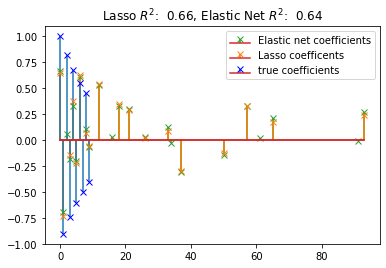

In [17]:
# Elasit Net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print(f'r^2 on test data : {r2_score_enet}')

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0], markerfmt='x', label='Elastic net coefficients', use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0], markerfmt='x', label='Lasso coefficents', use_line_collection=True)
plt.setp([m, s], color="#ff7f0e")
plt.stem(np.where(coef)[0], coef[coef!=0], label='true coefficients', markerfmt='bx', use_line_collection=True)
plt.legend(loc='best')
plt.title(f'Lasso $R^2$: {r2_score_lasso: .2f}, Elastic Net $R^2$: {r2_score_enet: .2f}')
plt.show()